In [126]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
#sns는 바다색깔

In [23]:
dbname="namovie.db"

In [1]:
def seldb(tcode):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor() #커서는 하나씩 일을해나가는것
        sql="""
        select 
        IDX,TITLE, POINT, TCODE 
        from movie1 
        where TCODE='"""+str(tcode)+"""'
        order by IDX
        """
        data=cur.execute(sql).fetchall()
        xdata=[]
        ydata=[]
        i=0
        for d in data:
            
            xdata.append(i)
            ydata.append(d[2])
            i+=1
            print(d,end="\n")
            
        conn.commit() #최종확인
        cur.close()
        return (xdata,ydata)
        

In [107]:
seldb(4)

(15889831, '기방도령', 10, 4)
(15889832, '기방도령', 10, 4)
(15889835, '기방도령', 10, 4)
(15889837, '기방도령', 10, 4)
(15889853, '기방도령', 10, 4)
(15889859, '기방도령', 10, 4)
(15889873, '기방도령', 8, 4)
(15889875, '기방도령', 10, 4)
(15889882, '기방도령', 10, 4)
(15889884, '기방도령', 10, 4)
(15889885, '기방도령', 10, 4)
(15889889, '기방도령', 10, 4)
(15889919, '기방도령', 10, 4)
(15889921, '기방도령', 9, 4)
(15889932, '기방도령', 10, 4)
(15889933, '기방도령', 10, 4)
(15889936, '기방도령', 10, 4)
(15889951, '기방도령', 8, 4)
(15889952, '기방도령', 10, 4)
(15889957, '기방도령', 10, 4)
(15889958, '기방도령', 9, 4)
(15889959, '기방도령', 10, 4)
(15889966, '기방도령', 10, 4)
(15889968, '기방도령', 1, 4)
(15889970, '기방도령', 10, 4)
(15889973, '기방도령', 10, 4)
(15889977, '기방도령', 10, 4)
(15889990, '기방도령', 10, 4)
(15889995, '기방도령', 10, 4)
(15890005, '기방도령', 10, 4)
(15890015, '기방도령', 10, 4)
(15890019, '기방도령', 10, 4)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [10,
  10,
  10,
  10,
  10,
  10,
  8,
  10,
  10,
  10,
  10,
  10,
  10,
  9,
  10,
  10,
  10,
  8,
  10,
  10,
  9,
  10,
  10,
  1,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10])

In [127]:
def seltitle():
    fig=plt.figure(figsize=(30,60))
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor() #커서는 하나씩 일을해나가는것
        sql= 'select TIDX, TNAME from titles order by TIDX'
        
        data=cur.execute(sql).fetchall()
        i=0
        for d in data:
            gdata=seldb(d[0])
            if (len(gdata[0])>1):
                #print("*"*20)
                #print(d[1])
                #print("*"*20)
                #print(d,end="\n")
                pos=divmod(i,3)
                i+=1
                plt.subplot(row,col,i)
                x_=gdata[0]
                y_=gdata[1]
                #y=wx_+b
                A=np.vstack([x_,np.ones(len(x_))]).T
                w,b = np.linalg.listsq(A,y_)[0]
                x_=np.ndarray(gdata[0])
                plt.plot(x_,y_,'ro', label="DATA")
                plt.plot(x_,w*x_+b,'b', lacel="FIT")
                plt.legend()
                
                plt.title(d[1])
        conn.commit() #최종확인
        cur.close()
        return (xdata,ydata)

(15890018, '극장판 쿠로코의 농구 라스트 게임', 10, 1)
(15889867, '헬보이', 8, 2)
(15890017, '헬보이', 1, 2)


AttributeError: module 'numpy.linalg' has no attribute 'listsq'

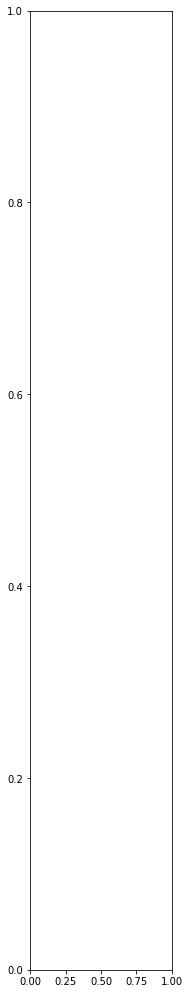

In [128]:
seltitle()